In [252]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("/Users/dq/Downloads/retail_sales_dataset.csv")
df.head()

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100


In [254]:
df.isnull().sum()

Transaction ID      0
Date                0
Customer ID         0
Gender              0
Age                 0
Product Category    0
Quantity            0
Price per Unit      0
Total Amount        0
dtype: int64

In [260]:
df['Date'] = pd.to_datetime(df['Date'])
df = df.sort_values(by='Date')
df.head()

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
521,522,2023-01-01,CUST522,Male,46,Beauty,3,500,1500
179,180,2023-01-01,CUST180,Male,41,Clothing,3,300,900
558,559,2023-01-01,CUST559,Female,40,Clothing,4,300,1200
302,303,2023-01-02,CUST303,Male,19,Electronics,3,30,90
978,979,2023-01-02,CUST979,Female,19,Beauty,1,25,25


In [262]:
category_counts = df['Product Category'].value_counts()
category_counts

Product Category
Clothing       351
Electronics    342
Beauty         307
Name: count, dtype: int64

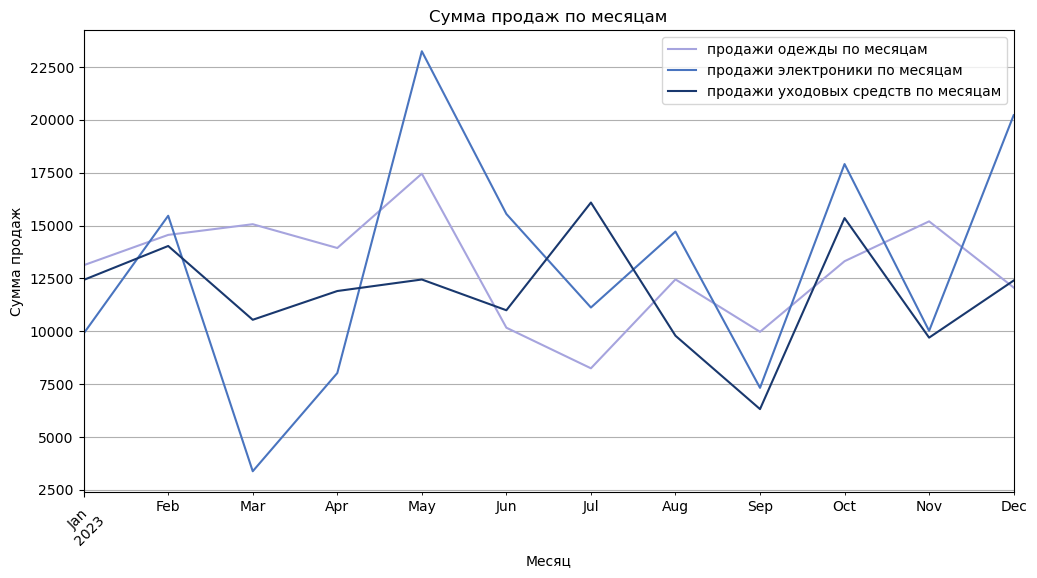

In [264]:
clothing_df = df[df['Product Category'] == 'Clothing'].copy()
clothing_df.loc[:, 'Month'] = clothing_df['Date'].dt.to_period('M')
monthly_amount1 = clothing_df.groupby('Month')['Total Amount'].sum()

electronics_df = df[df['Product Category'] == 'Electronics'].copy()
electronics_df.loc[:, 'Month'] = electronics_df['Date'].dt.to_period('M')
monthly_amount2 = electronics_df.groupby('Month')['Total Amount'].sum()
monthly_amount2 = monthly_amount2.iloc[:-1]

beauty_df = df[df['Product Category'] == 'Beauty'].copy()
beauty_df.loc[:, 'Month'] = beauty_df['Date'].dt.to_period('M')
monthly_amount3 = beauty_df.groupby('Month')['Total Amount'].sum()
monthly_amount3 = monthly_amount3.iloc[:-1]

plt.figure(figsize=(12, 6))
monthly_amount1.plot(kind='line', color='#a6a4de', label = 'продажи одежды по месяцам')
monthly_amount2.plot(kind='line', color='#4974bf', label = 'продажи электроники по месяцам')
monthly_amount3.plot(kind='line', color='#19386e', label = 'продажи уходовых средств по месяцам')
plt.title('Сумма продаж по месяцам')
plt.xlabel('Месяц')
plt.ylabel('Сумма продаж')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

             Clothing  Electronics    Beauty
Clothing     1.000000     0.187456 -0.006649
Electronics  0.187456     1.000000  0.397537
Beauty      -0.006649     0.397537  1.000000


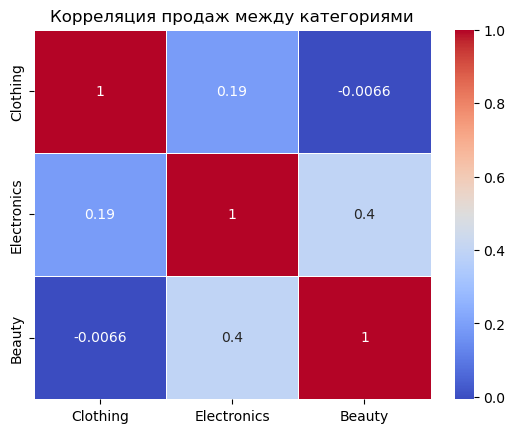

In [266]:
monthly_sales = pd.DataFrame({'Clothing': monthly_amount1,
    'Electronics': monthly_amount2,
    'Beauty': monthly_amount3})

print(monthly_sales.corr())
sns.heatmap(monthly_sales.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Корреляция продаж между категориями")
plt.show()

             Clothing  Electronics    Beauty
Clothing     1.000000     0.141864  0.062393
Electronics  0.141864     1.000000 -0.039397
Beauty       0.062393    -0.039397  1.000000


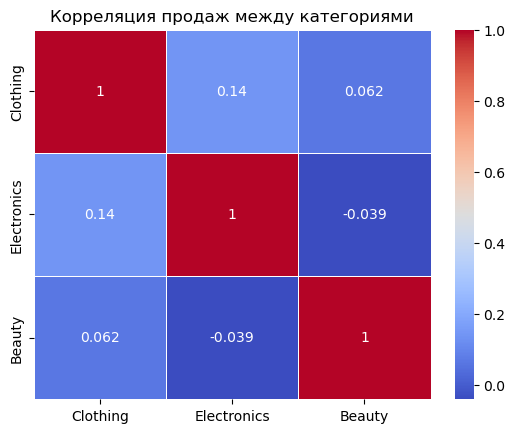

In [269]:
clothing_df.loc[:, 'Week'] = clothing_df['Date'].dt.to_period('W')
weekly_amount1 = clothing_df.groupby('Week')['Total Amount'].sum()

electronics_df.loc[:, 'Week'] = electronics_df['Date'].dt.to_period('W')
weekly_amount2 = electronics_df.groupby('Week')['Total Amount'].sum()

beauty_df.loc[:, 'Week'] = beauty_df['Date'].dt.to_period('W')
weekly_amount3 = beauty_df.groupby('Week')['Total Amount'].sum()

weekly_sales = pd.DataFrame({'Clothing': weekly_amount1,
    'Electronics': weekly_amount2,
    'Beauty': weekly_amount3})

print(weekly_sales.corr())
sns.heatmap(weekly_sales.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Корреляция продаж между категориями")
plt.show()


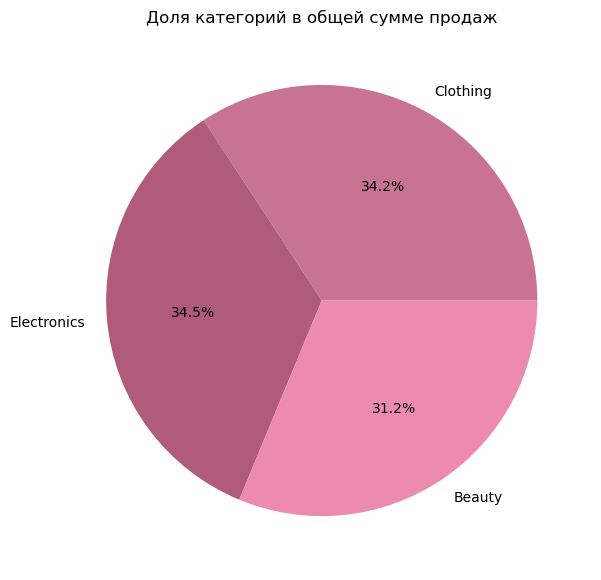

In [272]:
total_sales = pd.Series({
    'Clothing': monthly_amount1.sum(),
    'Electronics': monthly_amount2.sum(),
    'Beauty': monthly_amount3.sum()
})

plt.figure(figsize=(7, 7))
total_sales.plot(kind='pie', autopct='%1.1f%%', colors=['#c97393', '#b05b7b', '#ed8aaf'])
plt.title("Доля категорий в общей сумме продаж")
plt.ylabel("")
plt.show()

In [274]:
print("Топ-3 месяца с самыми высокими продажами одежды:")
print(monthly_amount1.nlargest(3))

print("Топ-3 месяца с самыми низкими продажами одежды:")
print(monthly_amount1.nsmallest(3))

print("Топ-3 месяца с самыми высокими продажами электроники:")
print(monthly_amount2.nlargest(3))

print("Топ-3 месяца с самыми низкими продажами электроники:")
print(monthly_amount2.nsmallest(3))

print("Топ-3 месяца с самыми высокими продажами уходовых средств:")
print(monthly_amount3.nlargest(3))

print("Топ-3 месяца с самыми низкими продажами уходовых средств:")
print(monthly_amount3.nsmallest(3))


Топ-3 месяца с самыми высокими продажами одежды:
Month
2023-05    17455
2023-11    15200
2023-03    15065
Freq: M, Name: Total Amount, dtype: int64
Топ-3 месяца с самыми низкими продажами одежды:
Month
2023-07     8250
2023-09     9975
2023-06    10170
Freq: M, Name: Total Amount, dtype: int64
Топ-3 месяца с самыми высокими продажами электроники:
Month
2023-05    23245
2023-12    20220
2023-10    17910
Freq: M, Name: Total Amount, dtype: int64
Топ-3 месяца с самыми низкими продажами электроники:
Month
2023-03    3380
2023-09    7325
2023-04    8025
Freq: M, Name: Total Amount, dtype: int64
Топ-3 месяца с самыми высокими продажами уходовых средств:
Month
2023-07    16090
2023-10    15355
2023-02    14035
Freq: M, Name: Total Amount, dtype: int64
Топ-3 месяца с самыми низкими продажами уходовых средств:
Month
2023-09    6320
2023-11    9700
2023-08    9790
Freq: M, Name: Total Amount, dtype: int64


<Figure size 1200x600 with 0 Axes>

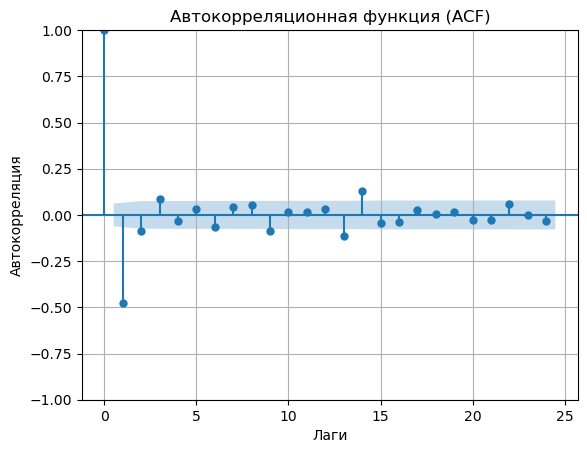

In [279]:
from statsmodels.graphics.tsaplots import plot_acf

df.set_index('Date', inplace=True)
df_diff = df['Total Amount'].diff().dropna()

plt.figure(figsize=(12, 6))
plot_acf(df_diff, lags=24)
plt.title('Автокорреляционная функция (ACF)')
plt.xlabel('Лаги')
plt.ylabel('Автокорреляция')
plt.grid(True)
plt.show()


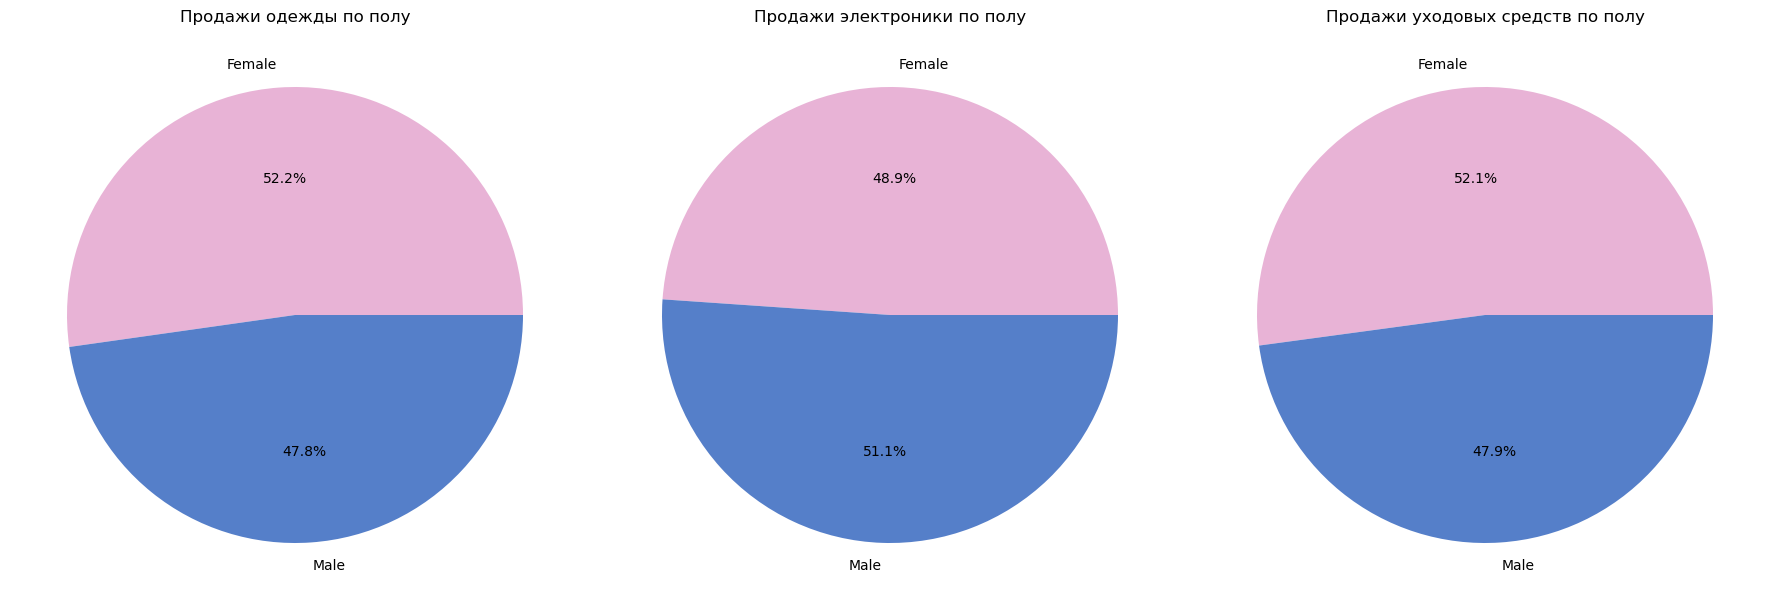

In [302]:
# Сегментация по категориям товаров и полу
category_gender_sales = df.groupby(['Product Category', 'Gender'])['Total Amount'].sum().unstack()

# Визуализация с использованием pie диаграмм для каждой категории товара
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Диаграмма для одежды
category_gender_sales.loc['Clothing'].plot(kind='pie', autopct='%1.1f%%', ax=axes[0], colors=['#e8b3d6', '#557fc9'], title='Продажи одежды по полу')
axes[0].set_ylabel('')

# Диаграмма для электроники
category_gender_sales.loc['Electronics'].plot(kind='pie', autopct='%1.1f%%', ax=axes[1], colors=['#e8b3d6', '#557fc9'], title='Продажи электроники по полу')
axes[1].set_ylabel('')

# Диаграмма для уходовых средств
category_gender_sales.loc['Beauty'].plot(kind='pie', autopct='%1.1f%%', ax=axes[2], colors=['#e8b3d6', '#557fc9'], title='Продажи уходовых средств по полу')
axes[2].set_ylabel('')

plt.tight_layout()
plt.show()


In [308]:
df.describe()

,Transaction ID,Age,Quantity,Price per Unit,Total Amount
count,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000
mean,500.500000,41.39200,2.514000,179.890000,456.000000
std,288.819436,13.68143,1.132734,189.681356,559.997632
min,1.000000,18.00000,1.000000,25.000000,25.000000
25%,250.750000,29.00000,1.000000,30.000000,60.000000
50%,500.500000,42.00000,3.000000,50.000000,135.000000
75%,750.250000,53.00000,4.000000,300.000000,900.000000
max,1000.000000,64.00000,4.000000,500.000000,2000.000000
